### **Importing Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

### **Importing Dataset and Creating DataFrames**

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## **Exploratory Data Analysis**

In [7]:
train_df.head()

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,01/01/2002 00,1,Studio,15.31,46.61,1.06,0.97,Low,0,Swimming Pool,0.0,64.85
1,01/01/2002 08,4,NaN,21.01,66.11,2.98,0.91,Upper Middle,1,Swimming Pool,1.0,192.50
2,01/01/2002 16,2,Cottage,12.86,60.86,1.44,1.43,Middle,0,NaN,1.0,116.62
3,02/01/2002 00,2,1BHK,20.16,50.58,1.48,0.91,Middle,-1,Garden,0.0,76.96
4,02/01/2002 08,2,Cottage,16.23,52.25,1.14,1.11,Middle,0,Fountain,0.0,104.70


In [8]:
test_df.head()

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage
0,11/10/2014 16,5,Bungalow,11.89,57.88,2.77,1.48,Upper Middle,1,Jacuzzi,0.0
1,12/10/2014 00,4,Bungalow,29.22,61.41,2.85,1.30,Upper Middle,0,Garden,NaN
2,12/10/2014 08,3,Cottage,10.27,64.9,1.66,0.97,Middle,0,NaN,0.0
3,12/10/2014 16,3,1BHK,27.03,52.67,1.48,1.31,Low,0,NaN,0.0
4,13/10/2014 00,2,Cottage,12.32,55.23,1.19,1.30,Middle,0,Swimming Pool,0.0


In [9]:
train_df.shape

(14000, 12)

In [10]:
test_df.shape

(6000, 11)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 14000 non-null  object 
 1   Residents                 14000 non-null  int64  
 2   Apartment_Type            13574 non-null  object 
 3   Temperature               13559 non-null  float64
 4   Humidity                  14000 non-null  object 
 5   Water_Price               14000 non-null  float64
 6   Period_Consumption_Index  14000 non-null  float64
 7   Income_Level              13574 non-null  object 
 8   Guests                    14000 non-null  int64  
 9   Amenities                 8003 non-null   object 
 10  Appliance_Usage           13585 non-null  float64
 11  Water_Consumption         14000 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.3+ MB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 6000 non-null   object 
 1   Residents                 6000 non-null   int64  
 2   Apartment_Type            5834 non-null   object 
 3   Temperature               5850 non-null   float64
 4   Humidity                  6000 non-null   object 
 5   Water_Price               6000 non-null   float64
 6   Period_Consumption_Index  6000 non-null   float64
 7   Income_Level              5835 non-null   object 
 8   Guests                    6000 non-null   int64  
 9   Amenities                 3487 non-null   object 
 10  Appliance_Usage           5823 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 515.8+ KB


In [13]:
train_df.describe()

,Residents,Temperature,Water_Price,Period_Consumption_Index,Guests,Appliance_Usage,Water_Consumption
count,14000.000000,13559.000000,14000.000000,14000.000000,14000.000000,13585.000000,14000.000000
mean,2.078429,22.566559,0.657924,1.152890,0.292929,0.201987,164.461230
std,9.241665,7.216447,8.765776,0.229047,0.489164,0.401498,72.873894
min,-99.000000,10.000000,-99.000000,-0.130782,-2.000000,0.000000,35.540000
25%,2.000000,16.340000,1.320000,0.970000,0.000000,0.000000,109.550000
50%,3.000000,22.580000,1.630000,1.150000,0.000000,0.000000,150.375000
75%,4.000000,28.850000,2.112500,1.330000,1.000000,0.000000,206.765000
max,5.000000,35.000000,3.000000,2.352311,3.000000,1.000000,531.490000


#### **Removing nulls from dataframe**

In [15]:
train_df.isnull().sum()

Timestamp                      0
Residents                      0
Apartment_Type               426
Temperature                  441
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                 426
Guests                         0
Amenities                   5997
Appliance_Usage              415
Water_Consumption              0
dtype: int64

In [16]:
test_df.isnull().sum()

Timestamp                      0
Residents                      0
Apartment_Type               166
Temperature                  150
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                 165
Guests                         0
Amenities                   2513
Appliance_Usage              177
dtype: int64

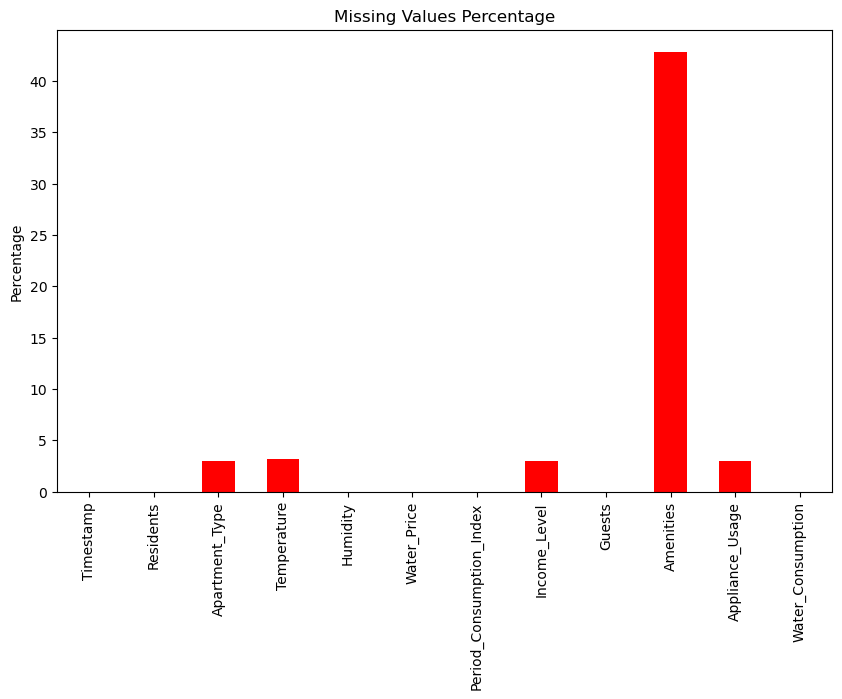

In [17]:
missing_values = (train_df.isnull().sum() / len(train_df)) * 100

missing_values_df = pd.DataFrame(missing_values, columns=["Missing Percentage"])

missing_values_df.plot(kind='bar', figsize=(10,6), ylabel='Percentage', legend=False, color='red')
plt.title("Missing Values Percentage")
plt.show()

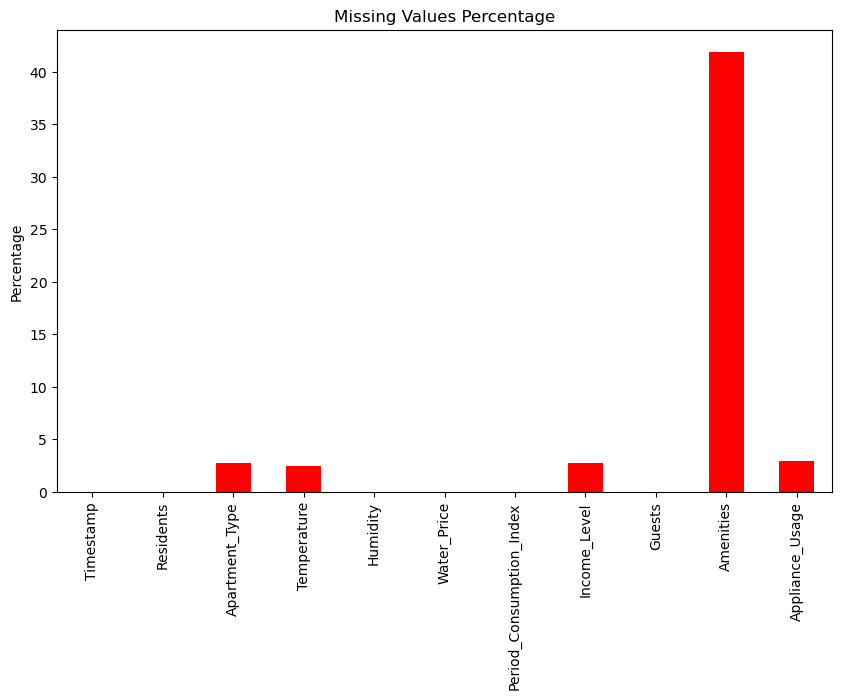

In [18]:
missing_values = (test_df.isnull().sum() / len(test_df)) * 100

missing_values_df = pd.DataFrame(missing_values, columns=["Missing Percentage"])

missing_values_df.plot(kind='bar', figsize=(10,6), ylabel='Percentage', legend=False, color='red')
plt.title("Missing Values Percentage")
plt.show()

In [19]:
train_df.drop(columns=['Amenities'], inplace=True)
test_df.drop(columns=['Amenities'], inplace=True)

In [20]:
train_df.columns

Index(['Timestamp', 'Residents', 'Apartment_Type', 'Temperature', 'Humidity',
       'Water_Price', 'Period_Consumption_Index', 'Income_Level', 'Guests',
       'Appliance_Usage', 'Water_Consumption'],
      dtype='object')

In [21]:
test_df.columns

Index(['Timestamp', 'Residents', 'Apartment_Type', 'Temperature', 'Humidity',
       'Water_Price', 'Period_Consumption_Index', 'Income_Level', 'Guests',
       'Appliance_Usage'],
      dtype='object')

In [22]:
numerical_cols = ['Temperature']

for col in numerical_cols:
    median_value = train_df[col].median()

    train_df.loc[:, col] = train_df[col].fillna(median_value)
    test_df.loc[:, col] = test_df[col].fillna(median_value)

In [23]:
train_df['Temperature'].isnull().sum()

0

In [24]:
train_df["Humidity"] = pd.to_numeric(train_df["Humidity"], errors="coerce")
test_df["Humidity"] = pd.to_numeric(test_df["Humidity"], errors="coerce")

train_df["Humidity"] = train_df["Humidity"].fillna(train_df["Humidity"].median())
test_df["Humidity"] = test_df["Humidity"].fillna(test_df["Humidity"].median())

In [25]:
print(train_df.dtypes)
print(test_df.dtypes)

Timestamp                    object
Residents                     int64
Apartment_Type               object
Temperature                 float64
Humidity                    float64
Water_Price                 float64
Period_Consumption_Index    float64
Income_Level                 object
Guests                        int64
Appliance_Usage             float64
Water_Consumption           float64
dtype: object
Timestamp                    object
Residents                     int64
Apartment_Type               object
Temperature                 float64
Humidity                    float64
Water_Price                 float64
Period_Consumption_Index    float64
Income_Level                 object
Guests                        int64
Appliance_Usage             float64
dtype: object


In [26]:
label_encode_cols = ['Apartment_Type', 'Income_Level']

for col in label_encode_cols:
    if col in train_df.columns and col in test_df.columns:

        train_df[col] = train_df[col].fillna('Unknown')
        test_df[col] = test_df[col].fillna('Unknown')

        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])

        unseen_values = set(test_df[col]) - set(le.classes_)
        if unseen_values:
            le.classes_ = np.append(le.classes_, list(unseen_values))

        test_df[col] = le.transform(test_df[col])

In [27]:
for col in train_df.columns:
    if train_df[col].isnull().sum() > 0:
        if train_df[col].dtype == 'object':
            mode_value = train_df[col].mode()[0]
            train_df.loc[:, col] = train_df[col].fillna(mode_value)
            test_df.loc[:, col] = test_df[col].fillna(mode_value)
        else:
            median_value = train_df[col].median()
            train_df.loc[:, col] = train_df[col].fillna(median_value)
            test_df.loc[:, col] = test_df[col].fillna(median_value)

In [28]:
mode_value = train_df['Appliance_Usage'].mode()[0]

train_df.loc[:, 'Appliance_Usage'] = train_df['Appliance_Usage'].fillna(mode_value)
test_df.loc[:, 'Appliance_Usage'] = test_df['Appliance_Usage'].fillna(mode_value)

In [29]:
train_df.isnull().sum()

Timestamp                   0
Residents                   0
Apartment_Type              0
Temperature                 0
Humidity                    0
Water_Price                 0
Period_Consumption_Index    0
Income_Level                0
Guests                      0
Appliance_Usage             0
Water_Consumption           0
dtype: int64

In [30]:
test_df.isnull().sum()

Timestamp                   0
Residents                   0
Apartment_Type              0
Temperature                 0
Humidity                    0
Water_Price                 0
Period_Consumption_Index    0
Income_Level                0
Guests                      0
Appliance_Usage             0
dtype: int64

## **Data Visualisation**

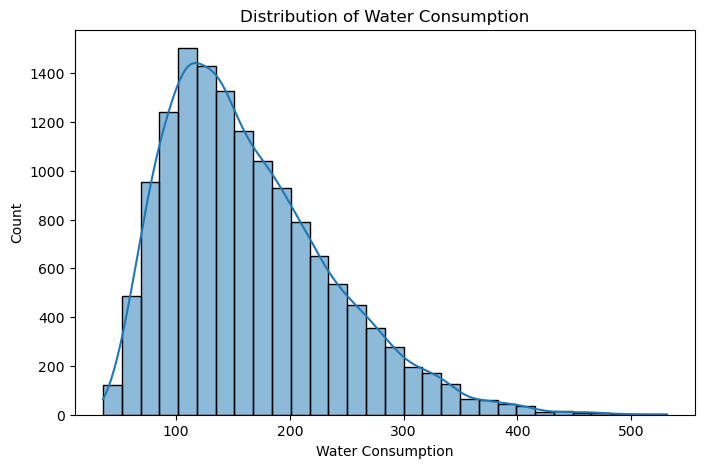

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Water_Consumption'], bins=30, kde=True)
plt.title("Distribution of Water Consumption")
plt.xlabel("Water Consumption")
plt.ylabel("Count")
plt.show()

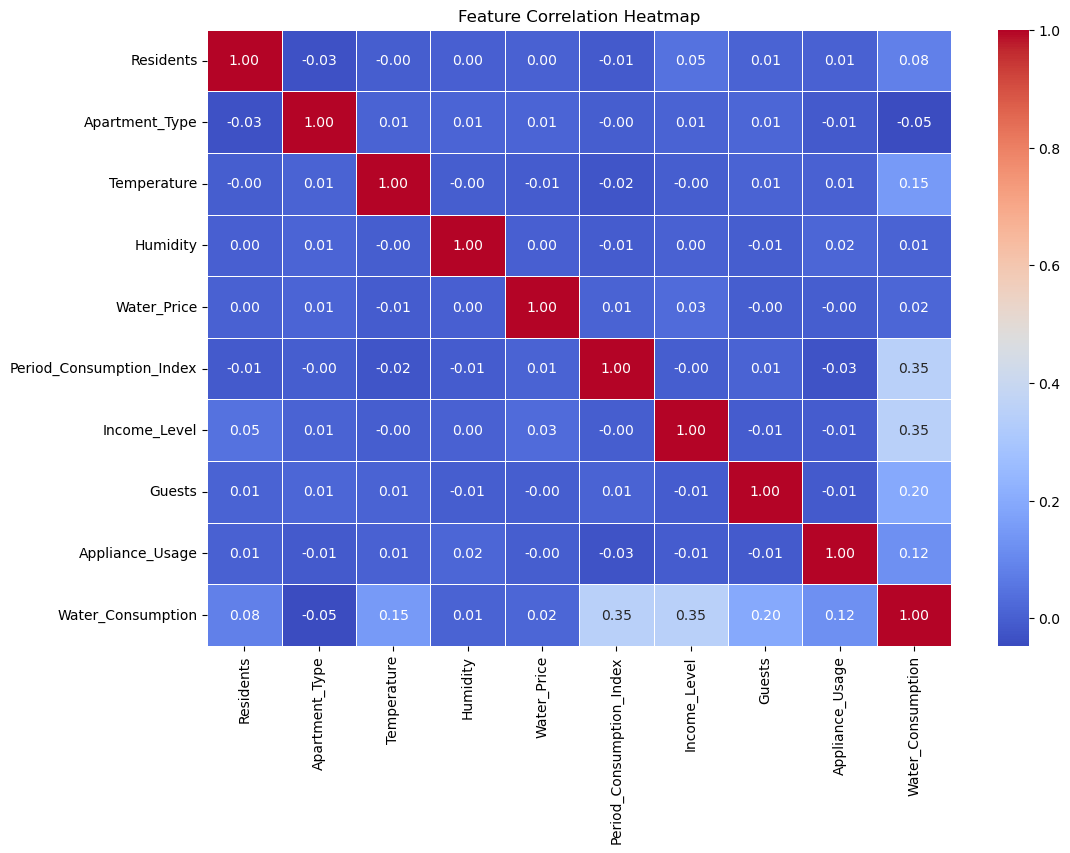

In [33]:
numeric_train_df = train_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

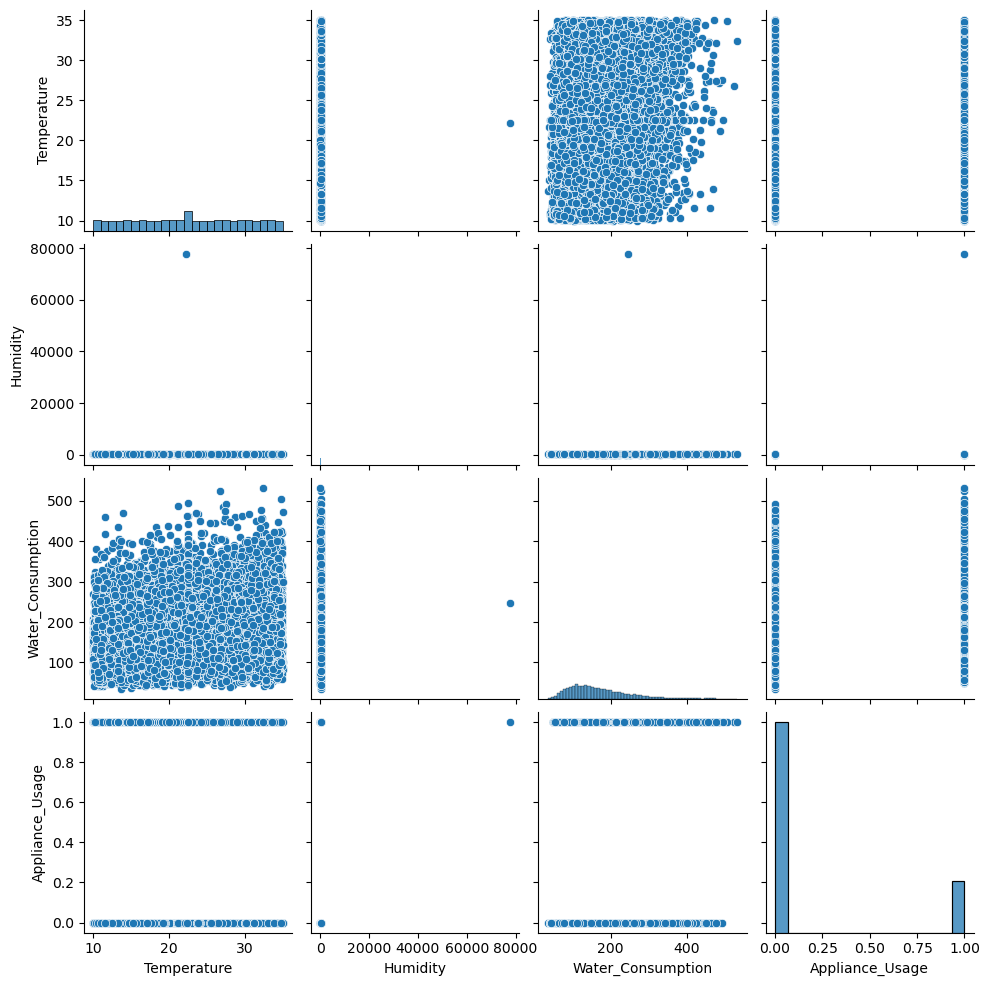

In [34]:
sns.pairplot(train_df[['Temperature', 'Humidity', 'Water_Consumption', 'Appliance_Usage']])
plt.show()

In [35]:
train_df['Timestamp'].unique()

array(['01/01/2002 00', '01/01/2002 08', '01/01/2002 16', ...,
       '10/10/2014 16', '11/10/2014 00', '11/10/2014 08'], dtype=object)

In [36]:
test_df['Timestamp'].unique()

array(['11/10/2014 16', '12/10/2014 00', '12/10/2014 08', ...,
       '01/04/2020 16', '02/04/2020 00', '02/04/2020 08'], dtype=object)

In [37]:
def process_timestamp(df):

    df['Timestamp'] = df['Timestamp'].astype(str).str.strip()
    df['Timestamp'] = df['Timestamp'].replace('', pd.NA)
    df.dropna(subset=['Timestamp'], inplace=True)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H', errors='coerce')

    df['Hour'] = df['Timestamp'].dt.hour
    df['Day'] = df['Timestamp'].dt.day
    df['Month'] = df['Timestamp'].dt.month
    df['Year'] = df['Timestamp'].dt.year
    df['Weekday'] = df['Timestamp'].dt.weekday  # Monday=0, Sunday=6
    df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

    df.drop(columns=['Timestamp'], inplace=True)

    return df

timestamps = test_df['Timestamp']

train_df = process_timestamp(train_df)
test_df = process_timestamp(test_df)

print(train_df.head())
print(test_df.head())

   Residents  Apartment_Type  Temperature  Humidity  Water_Price  \
0          1               6        15.31     46.61         1.06   
1          4               7        21.01     66.11         2.98   
2          2               4        12.86     60.86         1.44   
3          2               0        20.16     50.58         1.48   
4          2               4        16.23     52.25         1.14   

   Period_Consumption_Index  Income_Level  Guests  Appliance_Usage  \
0                      0.97           193       0              0.0   
1                      0.91           239       1              1.0   
2                      1.43           196       0              1.0   
3                      0.91           196      -1              0.0   
4                      1.11           196       0              0.0   

   Water_Consumption  Hour  Day  Month  Year  Weekday  Weekend  
0              64.85     0    1      1  2002        1        0  
1             192.50     8    1      1  

In [38]:
timestamps

0       11/10/2014 16
1       12/10/2014 00
2       12/10/2014 08
3       12/10/2014 16
4       13/10/2014 00
            ...      
5995    01/04/2020 00
5996    01/04/2020 08
5997    01/04/2020 16
5998    02/04/2020 00
5999    02/04/2020 08
Name: Timestamp, Length: 6000, dtype: object

In [39]:
train_df.head()

,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Appliance_Usage,Water_Consumption,Hour,Day,Month,Year,Weekday,Weekend
0,1,6,15.31,46.61,1.06,0.97,193,0,0.0,64.85,0,1,1,2002,1,0
1,4,7,21.01,66.11,2.98,0.91,239,1,1.0,192.50,8,1,1,2002,1,0
2,2,4,12.86,60.86,1.44,1.43,196,0,1.0,116.62,16,1,1,2002,1,0
3,2,0,20.16,50.58,1.48,0.91,196,-1,0.0,76.96,0,2,1,2002,2,0
4,2,4,16.23,52.25,1.14,1.11,196,0,0.0,104.70,8,2,1,2002,2,0


In [40]:
test_df.head()

,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Appliance_Usage,Hour,Day,Month,Year,Weekday,Weekend
0,5,3,11.89,57.88,2.77,1.48,239,1,0.0,16,11,10,2014,5,1
1,4,3,29.22,61.41,2.85,1.30,239,0,0.0,0,12,10,2014,6,1
2,3,4,10.27,64.90,1.66,0.97,196,0,0.0,8,12,10,2014,6,1
3,3,0,27.03,52.67,1.48,1.31,193,0,0.0,16,12,10,2014,6,1
4,2,4,12.32,55.23,1.19,1.30,196,0,0.0,0,13,10,2014,0,0


### **Splitting the data**

In [42]:
X = train_df.drop(columns=['Water_Consumption'])
X.head()

,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Appliance_Usage,Hour,Day,Month,Year,Weekday,Weekend
0,1,6,15.31,46.61,1.06,0.97,193,0,0.0,0,1,1,2002,1,0
1,4,7,21.01,66.11,2.98,0.91,239,1,1.0,8,1,1,2002,1,0
2,2,4,12.86,60.86,1.44,1.43,196,0,1.0,16,1,1,2002,1,0
3,2,0,20.16,50.58,1.48,0.91,196,-1,0.0,0,2,1,2002,2,0
4,2,4,16.23,52.25,1.14,1.11,196,0,0.0,8,2,1,2002,2,0


In [43]:
y = train_df['Water_Consumption']
y.head()

0     64.85
1    192.50
2    116.62
3     76.96
4    104.70
Name: Water_Consumption, dtype: float64

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## **Choosing the Model**

In [46]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42
)

### **Fitting/Train the model**

In [48]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [49]:
y_pred = xgb_model.predict(X_val)
y_pred

array([ 99.985435,  98.45816 ,  93.31002 , ..., 120.09681 , 222.94682 ,
       121.10556 ], dtype=float32)

### **Testing the model performance**

In [51]:
mse = mean_squared_error(y_val, y_pred)
score = max(0, 100 - np.sqrt(mse))

print(f"Model Score: {score:.2f}")

Model Score: 77.40


In [52]:
r2 = r2_score(y_val, y_pred)

print(f"R² Score: {r2 * 100:.2f}%")  

R² Score: 90.87%


In [53]:
test_df['Water_Consumption'] = xgb_model.predict(test_df)
test_df.head()

,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Appliance_Usage,Hour,Day,Month,Year,Weekday,Weekend,Water_Consumption
0,5,3,11.89,57.88,2.77,1.48,239,1,0.0,16,11,10,2014,5,1,288.437897
1,4,3,29.22,61.41,2.85,1.30,239,0,0.0,0,12,10,2014,6,1,197.141006
2,3,4,10.27,64.90,1.66,0.97,196,0,0.0,8,12,10,2014,6,1,87.523651
3,3,0,27.03,52.67,1.48,1.31,193,0,0.0,16,12,10,2014,6,1,129.776917
4,2,4,12.32,55.23,1.19,1.30,196,0,0.0,0,13,10,2014,0,0,105.840851


In [54]:
submission = pd.DataFrame({'Timestamp': timestamps, 'Water_Consumption': test_df['Water_Consumption']})
submission.to_csv("submission.csv", index=False)

In [55]:
submission.head()

,Timestamp,Water_Consumption
0,11/10/2014 16,288.437897
1,12/10/2014 00,197.141006
2,12/10/2014 08,87.523651
3,12/10/2014 16,129.776917
4,13/10/2014 00,105.840851
